In [ ]:
pip install -U ydata-profiling

In [2]:
from logging import warning
import pandas as pd
import matplotlib.pyplot as plt
#from dataprep.eda import create_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_pd = pd.read_excel("/content/SKU's not ordered-01JAN24-17APR24.xlsx")
df_pd.head()

,Product name,Manufacturer name,Category name,SKU,Available cases (QTY),Wholesale price,Retail price,Cases sold,Total revenue
0,Test T,GNGR Labs,Uncategorized,1,0,1.00,2.00,0,0
1,Ginger Shots,GNGR Labs,Drinks,Immunity Aid / 2 fl oz,-320,29.88,47.88,0,0
2,Ginger Shots,GNGR Labs,Drinks,Vitamin C / 2 fl oz,354,49.99,47.88,0,0
3,Ginger Shots,GNGR Labs,Drinks,Digestive Aid / 2 fl oz,-200,29.88,47.88,0,0
4,Ginger Shots,GNGR Labs,Drinks,Immunity Booster / 2 fl oz,525,29.88,47.88,0,0


In [4]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product name           5 non-null      object 
 1   Manufacturer name      5 non-null      object 
 2   Category name          5 non-null      object 
 3   SKU                    5 non-null      object 
 4   Available cases (QTY)  5 non-null      int64  
 5   Wholesale price        5 non-null      float64
 6   Retail price           5 non-null      float64
 7   Cases sold             5 non-null      int64  
 8   Total revenue          5 non-null      int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 488.0+ bytes


In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_pd, title="Profiling Report")

In [6]:
# @title Report Order sales summary
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
import pandas as pd
import numpy as np

def preprocess_data(data):
    """
    Data preprocessing: data type conversion and cleaning.

    Args:
        data: A Pandas DataFrame with the source data.

    Returns:
        Pandas DataFrame with the processed data.
    """

    # Identify numeric columns automatically
    numeric_cols = data.select_dtypes(include=np.number).columns

    # Process numeric columns
    for col in numeric_cols:
        # Check for missing values (NaN)
        if np.isnan(data[col]).any():
            print(f"Warning: Column '{col}' contains missing values (NaN).")

    # Remove currency symbols and thousands separators
    data[numeric_cols] = data[numeric_cols].replace('[$,]', '', regex=True).astype(float)

    return data

In [8]:
processed_data = preprocess_data(df_pd)

In [9]:
processed_data

,Product name,Manufacturer name,Category name,SKU,Available cases (QTY),Wholesale price,Retail price,Cases sold,Total revenue
0,Test T,GNGR Labs,Uncategorized,1,0.0,1.00,2.00,0.0,0.0
1,Ginger Shots,GNGR Labs,Drinks,Immunity Aid / 2 fl oz,-320.0,29.88,47.88,0.0,0.0
2,Ginger Shots,GNGR Labs,Drinks,Vitamin C / 2 fl oz,354.0,49.99,47.88,0.0,0.0
3,Ginger Shots,GNGR Labs,Drinks,Digestive Aid / 2 fl oz,-200.0,29.88,47.88,0.0,0.0
4,Ginger Shots,GNGR Labs,Drinks,Immunity Booster / 2 fl oz,525.0,29.88,47.88,0.0,0.0


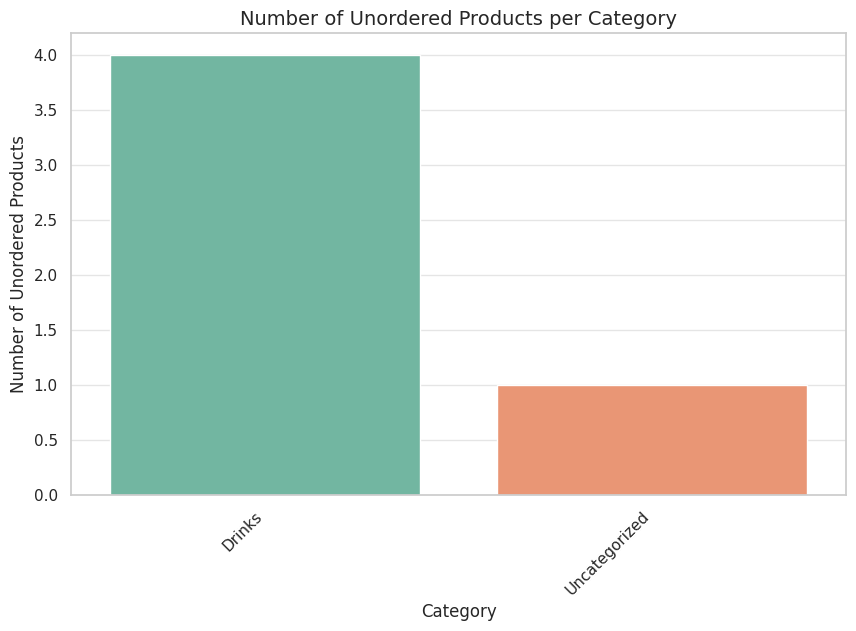

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_unordered_products_by_category(data, category_col='Category name'):
  """
  Visualizes the distribution of unordered products across different categories using a bar chart.

  Args:
    data (pd.DataFrame): The DataFrame containing unordered product data.
    category_col (str, optional): The name of the category column. Defaults to 'Category name'.
  """

  category_counts = data[category_col].value_counts()

  plt.figure(figsize=(10, 6))
  sns.barplot(x=category_counts.index, y=category_counts.values, palette="Set2")
  plt.title("Number of Unordered Products per Category", fontsize=14)
  plt.xlabel("Category", fontsize=12)
  plt.ylabel("Number of Unordered Products", fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', alpha=0.5)
  plt.show()

visualize_unordered_products_by_category(processed_data)

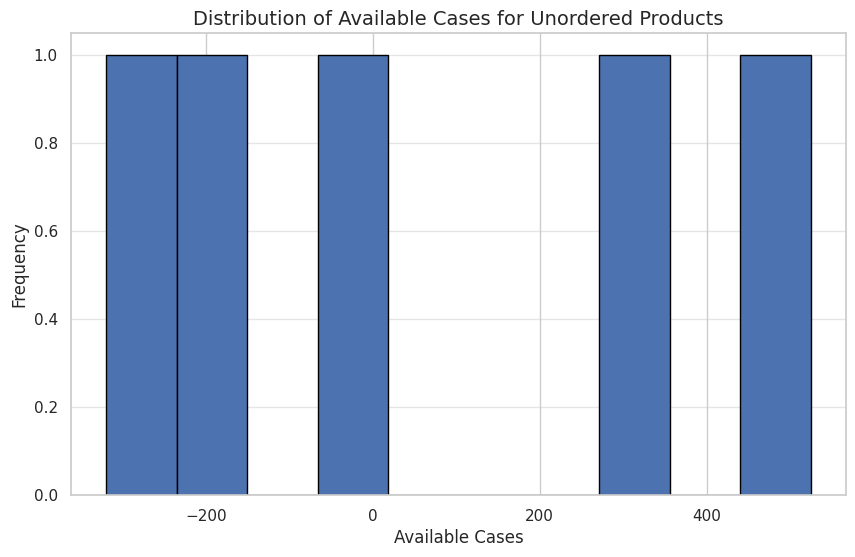

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_available_cases_distribution(data, available_cases_col='Available cases (QTY)'):
  """
  Visualizes the distribution of available cases for unordered products using a histogram.

  Args:
    data (pd.DataFrame): The DataFrame containing unordered product data.
    available_cases_col (str, optional): The name of the available cases column. Defaults to 'Available cases (QTY)'.
  """
  plt.figure(figsize=(10, 6))
  plt.hist(data[available_cases_col], bins=10, edgecolor='black')
  plt.title("Distribution of Available Cases for Unordered Products", fontsize=14)
  plt.xlabel("Available Cases", fontsize=12)
  plt.ylabel("Frequency", fontsize=12)
  plt.grid(axis='y', alpha=0.5)
  plt.show()

visualize_available_cases_distribution(processed_data)

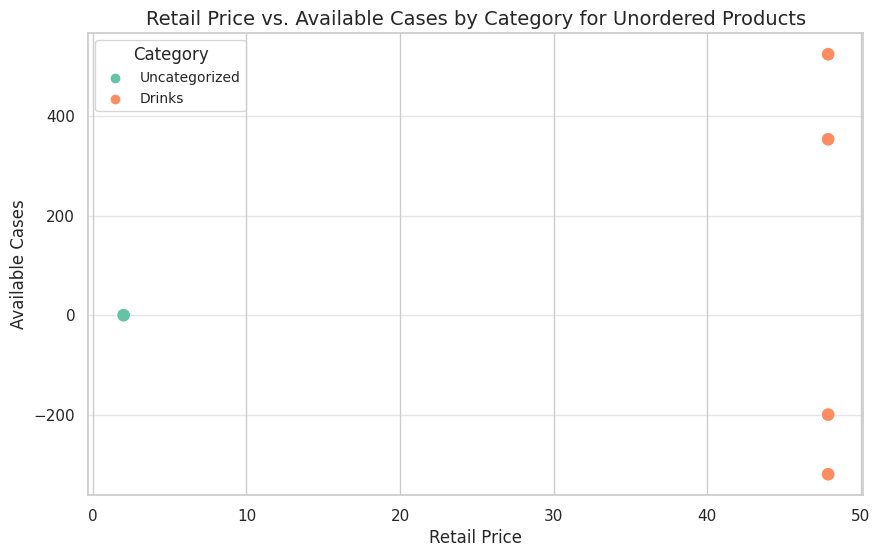

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_price_vs_available_cases_by_category(data, category_col='Category name', available_cases_col='Available cases (QTY)', retail_price_col='Retail price'):
  """
  Visualizes the relationship between retail price and available cases for unordered products, categorized by category.

  Args:
    data (pd.DataFrame): The DataFrame containing unordered product data.
    category_col (str, optional): The name of the category column. Defaults to 'Category name'.
    available_cases_col (str, optional): The name of the available cases column. Defaults to 'Available cases (QTY)'.
    retail_price_col (str, optional): The name of the retail price column. Defaults to 'Retail price'.
  """
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=retail_price_col, y=available_cases_col, hue=category_col, data=data, palette="Set2", s=100)
  plt.title("Retail Price vs. Available Cases by Category for Unordered Products", fontsize=14)
  plt.xlabel("Retail Price", fontsize=12)
  plt.ylabel("Available Cases", fontsize=12)
  plt.legend(title="Category", fontsize=10)
  plt.grid(axis='y', alpha=0.5)
  plt.show()

visualize_price_vs_available_cases_by_category(processed_data)

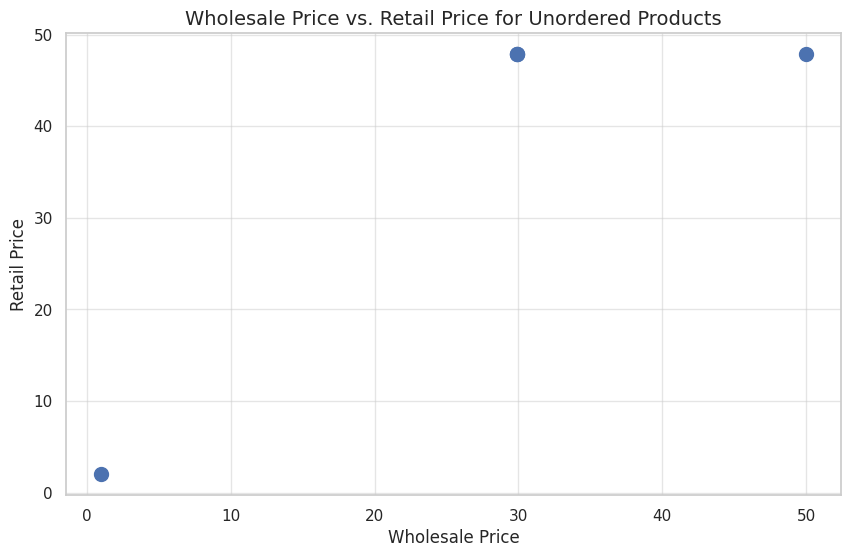

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_wholesale_vs_retail_price(data, wholesale_col='Wholesale price', retail_col='Retail price'):
  """
  Visualizes the relationship between wholesale and retail prices for unordered products using a scatter plot.

  Args:
    data (pd.DataFrame): The DataFrame containing unordered product data.
    wholesale_col (str, optional): The name of the wholesale price column. Defaults to 'Wholesale price'.
    retail_col (str, optional): The name of the retail price column. Defaults to 'Retail price'.
  """
  plt.figure(figsize=(10, 6))
  plt.scatter(data[wholesale_col], data[retail_col], s=100)
  plt.title("Wholesale Price vs. Retail Price for Unordered Products", fontsize=14)
  plt.xlabel("Wholesale Price", fontsize=12)
  plt.ylabel("Retail Price", fontsize=12)
  plt.grid(True, alpha=0.5)
  plt.show()

visualize_wholesale_vs_retail_price(processed_data)

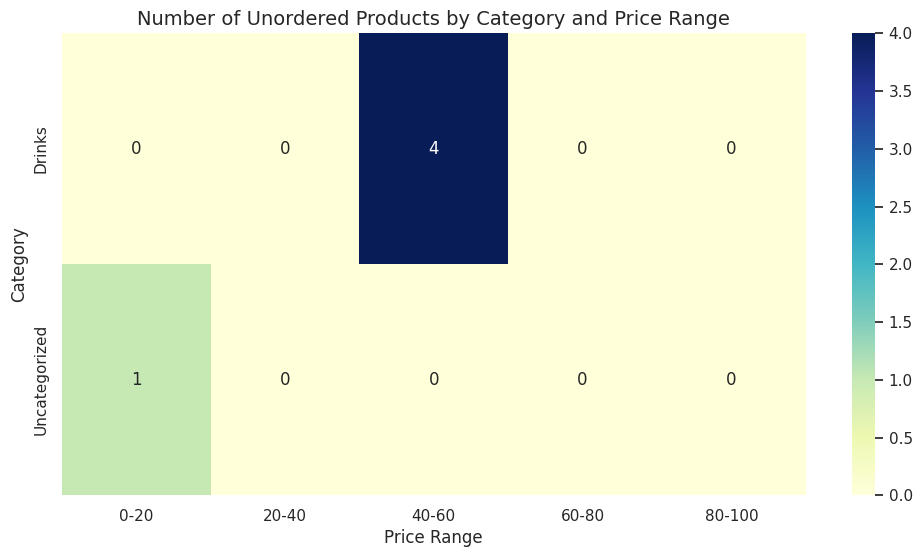

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_unordered_products_per_category_and_price_range(data, category_col='Category name', retail_price_col='Retail price'):
  """
  Visualizes the number of unordered products within different price ranges for each category.

  Args:
    data (pd.DataFrame): The DataFrame containing unordered product data.
    category_col (str, optional): The name of the category column. Defaults to 'Category name'.
    retail_price_col (str, optional): The name of the retail price column. Defaults to 'Retail price'.
  """
  # Define price ranges (adjust as needed for your data)
  price_ranges = [0, 20, 40, 60, 80, 100]
  price_labels = ["0-20", "20-40", "40-60", "60-80", "80-100"]

  data['Price Range'] = pd.cut(data[retail_price_col], bins=price_ranges, labels=price_labels)

  result = data.groupby([category_col, 'Price Range']).size().unstack(fill_value=0)

  plt.figure(figsize=(12, 6))
  sns.heatmap(result, annot=True, fmt=".0f", cmap="YlGnBu")
  plt.title("Number of Unordered Products by Category and Price Range", fontsize=14)
  plt.xlabel("Price Range", fontsize=12)
  plt.ylabel("Category", fontsize=12)
  plt.show()

visualize_unordered_products_per_category_and_price_range(processed_data)

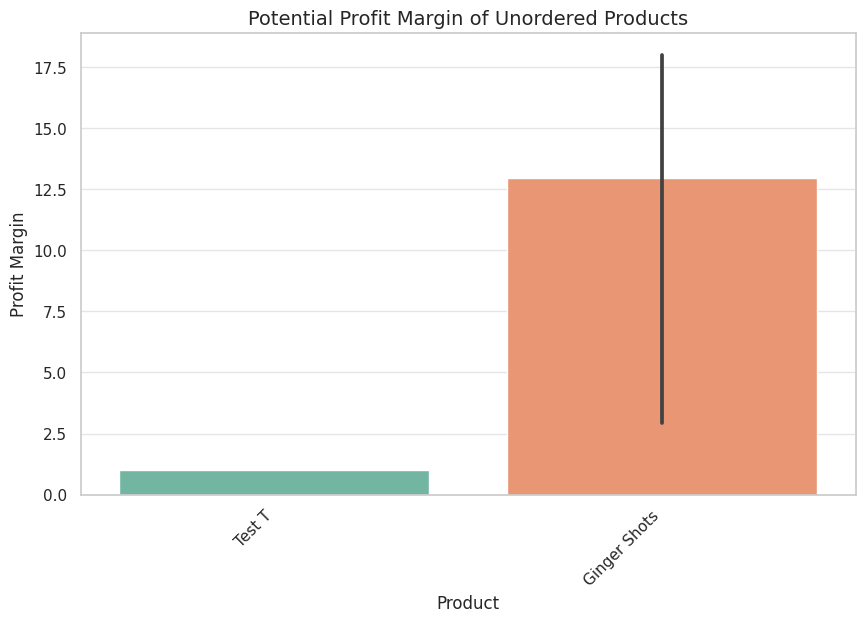

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_unordered_product_profitability(data, product_col='Product name', wholesale_col='Wholesale price', retail_col='Retail price'):
  """
  Visualizes the potential profitability of unordered products using a bar chart.

  Args:
    data (pd.DataFrame): The DataFrame containing unordered product data.
    product_col (str, optional): The name of the product column. Defaults to 'Product name'.
    wholesale_col (str, optional): The name of the wholesale price column. Defaults to 'Wholesale price'.
    retail_col (str, optional): The name of the retail price column. Defaults to 'Retail price'.
  """
  data['Profit Margin'] = data[retail_col] - data[wholesale_col]

  plt.figure(figsize=(10, 6))
  sns.barplot(x=product_col, y='Profit Margin', data=data, palette="Set2")
  plt.title("Potential Profit Margin of Unordered Products", fontsize=14)
  plt.xlabel("Product", fontsize=12)
  plt.ylabel("Profit Margin", fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', alpha=0.5)
  plt.show()

# Example usage
visualize_unordered_product_profitability(processed_data)

Profit Margin Calculation:
The function calculates the profit margin for each product by subtracting the wholesale price from the retail price.
A new column called "Profit Margin" is added to the DataFrame to store these values.
Bar Chart Creation:
A bar chart is created using sns.barplot with products on the x-axis and their corresponding profit margins on the y-axis.
The "Set2" palette is used for visually distinct bars.
Labels, Title, and Grid:
The plot includes a descriptive title, clear axis labels, and gridlines on the y-axis. The x-axis labels (product names) are rotated for readability.
Interpretation:
Profitability Comparison: This chart allows you to compare the potential profitability of different unordered products. Products with higher profit margins might be more attractive to promote or prioritize for sales efforts.




---





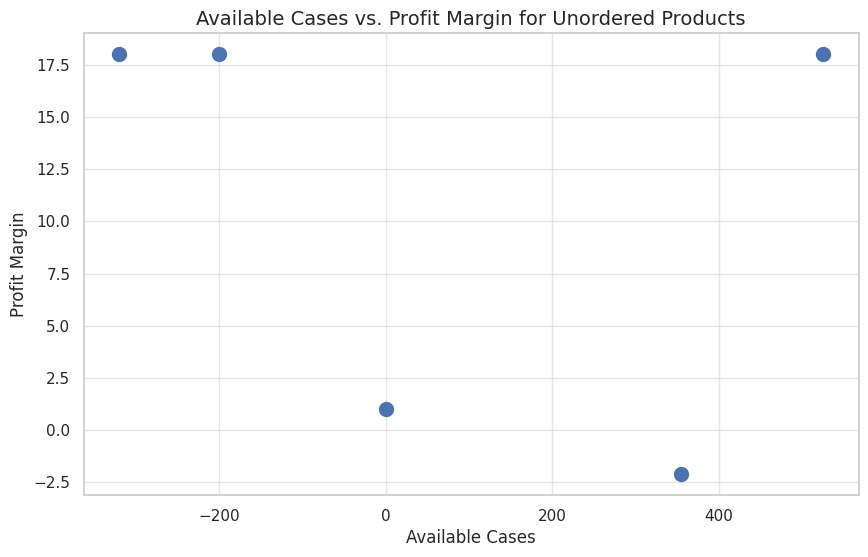

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_available_cases_vs_profit_margin(data, available_cases_col='Available cases (QTY)', wholesale_col='Wholesale price', retail_col='Retail price'):
  """
  Visualizes the relationship between available cases and profit margin for unordered products.

  Args:
    data (pd.DataFrame): The DataFrame containing unordered product data.
    available_cases_col (str, optional): The name of the available cases column. Defaults to 'Available cases (QTY)'.
    wholesale_col (str, optional): The name of the wholesale price column. Defaults to 'Wholesale price'.
    retail_col (str, optional): The name of the retail price column. Defaults to 'Retail price'.
  """
  data['Profit Margin'] = data[retail_col] - data[wholesale_col]

  plt.figure(figsize=(10, 6))
  plt.scatter(data[available_cases_col], data['Profit Margin'], s=100)
  plt.title("Available Cases vs. Profit Margin for Unordered Products", fontsize=14)
  plt.xlabel("Available Cases", fontsize=12)
  plt.ylabel("Profit Margin", fontsize=12)
  plt.grid(True, alpha=0.5)
  plt.show()

# Example usage
visualize_available_cases_vs_profit_margin(processed_data)

Inventory and Profitability Relationship: This plot helps you analyze if there's any relationship between the available cases and the profit margin of unordered products. For example, are products with higher profit margins tending to have more available cases (potentially indicating slower sales despite being more profitable)?
Pricing and Inventory Strategies: This visualization can provide insights into potential pricing adjustments or inventory management strategies for products with different profit margins and inventory levels.
Outlier Analysis: Look for outliers that might represent unique products with unusual combinations of profit margin and available cases.

---

